<a href="https://colab.research.google.com/github/Kimjibeom/Python_Example/blob/main/XOR_%EA%B2%8C%EC%9D%B4%ED%8A%B8_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OR 게이트 구현해보기 0,0->0 1,0->1 0,1->1 1,1->1

데이터 준비하기

In [1]:
import numpy as np

import tensorflow as tf
tf.random.set_seed(777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

In [2]:
# 데이터 준비하기
data = np.array([[0,0],[1,0],[0,1],[1,1]])  # XOR 연산 학습 데이터
label = np.array([[0],[1],[1],[0]])         # 정답 XOR

모델 구성하기

In [3]:
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu')) # 단층 퍼셉트론을 구성
model.add(Dense(1, activation='sigmoid'))

모델 설정하기

In [4]:
# model.compile(optimizer = SGD(), loss=mse, metrics=['acc])RMSprop
model.compile(optimizer= RMSprop(), loss=mse, metrics=['acc'])

In [5]:
# 모델 확인하기
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


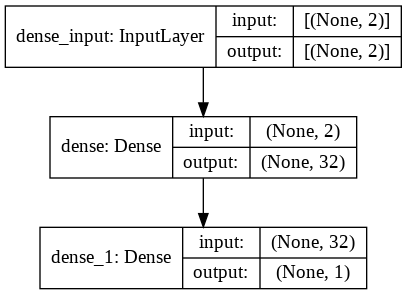

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

모델 학습시키기

In [7]:
history = model.fit(data, label, epochs=150) # 학습데이터, 정답, 공부 횟수

Epoch 1/150
1/1 [==============================] - 0s 492ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/150
1/1 [==============================] - 0s 7ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/150
1/1 [==============================] - 0s 5ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/150
1/1 [==============================] - 0s 6ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/150
1/1 [==============================] - 0s 4ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/150
1/1 [==============================] - 0s 8ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/150
1/1 [==============================] - 0s 5ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/150
1/1 [==============================] - 0s 6ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/150
1/1 [==============================] - 0s 8ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/150
1/1 [==============================] - 0s 5ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/150
1/1 [==============================] - 0s 5ms/step - loss: 0.252

학습결과 그려보기

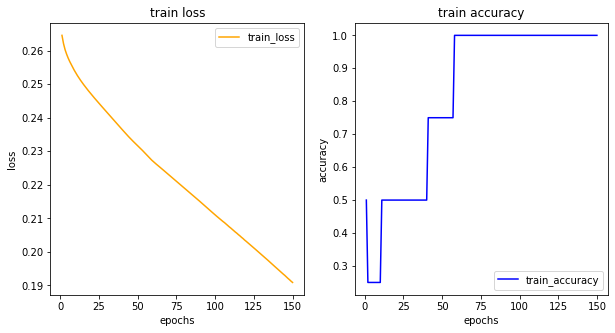

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

모델 가중치 확인

In [9]:
model.get_weights()

[array([[ 0.1980461 , -0.27609634,  0.53895414,  0.10854518, -0.21431386,
          0.2543306 ,  0.34462258, -0.05306936, -0.13779789, -0.23925437,
          0.09946181, -0.02900733,  0.13589987,  0.12446781,  0.1270931 ,
          0.42332327, -0.03311983, -0.37055987, -0.3493019 ,  0.22283524,
         -0.25554582, -0.29647002, -0.12625915,  0.12671351, -0.2702025 ,
         -0.4093977 ,  0.39525303, -0.17278033, -0.19288148,  0.34947097,
         -0.33862218, -0.00082418],
        [-0.32846928,  0.2744771 ,  0.21336174, -0.19489145,  0.17586312,
          0.14932764, -0.17635453,  0.2883298 ,  0.06527963,  0.19069424,
          0.09976406,  0.13599649,  0.0532534 ,  0.40327534,  0.3782639 ,
          0.2714045 , -0.01398495, -0.06497911,  0.04891233,  0.42132214,
          0.3835885 ,  0.29967758, -0.2543157 ,  0.34121653,  0.35323194,
         -0.17654489, -0.396119  , -0.3430747 ,  0.19147064,  0.24481004,
          0.05100494, -0.4087645 ]], dtype=float32),
 array([ 0.00226321, -0

모델 예측하기

In [10]:
result = model.predict(data)
print(result)

[[0.46838775]
 [0.5731102 ]
 [0.5736987 ]
 [0.4223943 ]]


In [11]:
result = model.predict_classes(data)
print(result)

[[0]
 [1]
 [1]
 [0]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
